<a href="https://colab.research.google.com/github/naiilard/Sentiment-Analysis/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Web Scraping and Analysis
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

nltk.download('averaged_perceptron_tagger_eng')

nltk.download('punkt_tab')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Web Scraping
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"{len(reviews)} total reviews")

Scraping page 1
100 total reviews
Scraping page 2
200 total reviews
Scraping page 3
300 total reviews
Scraping page 4
400 total reviews
Scraping page 5
500 total reviews
Scraping page 6
600 total reviews
Scraping page 7
700 total reviews
Scraping page 8
800 total reviews
Scraping page 9
900 total reviews
Scraping page 10
1000 total reviews


In [ ]:
# Save raw data
df = pd.DataFrame()
df["reviews"] = reviews

In [ ]:
os.makedirs("data", exist_ok=True)
df.to_csv("data/BA_reviews.csv", index=False)
df

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...
...,...
995,✅ Trip Verified | London to St Petersburgh. H...
996,✅ Trip Verified | Sydney to London via Singap...
997,Not Verified | London to Johannesburg. Britis...
998,✅ Trip Verified | I have to say travelling in ...


In [ ]:
df[['Review', 'Details']] = df['reviews'].str.split('|', expand=True, n=1)

In [ ]:
df

,reviews,Review,Details
0,✅ Trip Verified | This time British Airways ...,✅ Trip Verified,This time British Airways managed to get ev...
1,"✅ Trip Verified | The seats were excellent, ...",✅ Trip Verified,"The seats were excellent, with a feel of mu..."
2,✅ Trip Verified | After the nightmare of get...,✅ Trip Verified,After the nightmare of getting through trip...
3,✅ Trip Verified | Prior to boarding a gate a...,✅ Trip Verified,Prior to boarding a gate agent seemed to pi...
4,✅ Trip Verified | I flew from Amsterdam to L...,✅ Trip Verified,I flew from Amsterdam to Las Vegas with a l...
...,...,...,...
995,✅ Trip Verified | London to St Petersburgh. H...,✅ Trip Verified,London to St Petersburgh. Huge disappointmen...
996,✅ Trip Verified | Sydney to London via Singap...,✅ Trip Verified,Sydney to London via Singapore with British ...
997,Not Verified | London to Johannesburg. Britis...,Not Verified,London to Johannesburg. British Airways is o...
998,✅ Trip Verified | I have to say travelling in ...,✅ Trip Verified,I have to say travelling in Club Europe is a ...


In [ ]:
# Cleaning text
def clean(text):
    text = re.sub('[^A-Za-z ]+', ' ', str(text))  # Keep only letters and spaces
    return text.lower().strip()

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df

,reviews,Review,Details,Cleaned Reviews
0,✅ Trip Verified | This time British Airways ...,✅ Trip Verified,This time British Airways managed to get ev...,trip verified this time british airways man...
1,"✅ Trip Verified | The seats were excellent, ...",✅ Trip Verified,"The seats were excellent, with a feel of mu...",trip verified the seats were excellent wi...
2,✅ Trip Verified | After the nightmare of get...,✅ Trip Verified,After the nightmare of getting through trip...,trip verified after the nightmare of getti...
3,✅ Trip Verified | Prior to boarding a gate a...,✅ Trip Verified,Prior to boarding a gate agent seemed to pi...,trip verified prior to boarding a gate age...
4,✅ Trip Verified | I flew from Amsterdam to L...,✅ Trip Verified,I flew from Amsterdam to Las Vegas with a l...,trip verified i flew from amsterdam to las...
...,...,...,...,...
995,✅ Trip Verified | London to St Petersburgh. H...,✅ Trip Verified,London to St Petersburgh. Huge disappointmen...,trip verified london to st petersburgh hug...
996,✅ Trip Verified | Sydney to London via Singap...,✅ Trip Verified,Sydney to London via Singapore with British ...,trip verified sydney to london via singapor...
997,Not Verified | London to Johannesburg. Britis...,Not Verified,London to Johannesburg. British Airways is o...,not verified london to johannesburg britis...
998,✅ Trip Verified | I have to say travelling in ...,✅ Trip Verified,I have to say travelling in Club Europe is a ...,trip verified i have to say travelling in cl...


In [ ]:
# POS tagging and lemmatization
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df

,reviews,Review,Details,Cleaned Reviews,POS tagged
0,✅ Trip Verified | This time British Airways ...,✅ Trip Verified,This time British Airways managed to get ev...,trip verified this time british airways man...,"[(trip, n), (verified, v), (time, n), (british..."
1,"✅ Trip Verified | The seats were excellent, ...",✅ Trip Verified,"The seats were excellent, with a feel of mu...",trip verified the seats were excellent wi...,"[(trip, n), (verified, v), (seats, n), (excell..."
2,✅ Trip Verified | After the nightmare of get...,✅ Trip Verified,After the nightmare of getting through trip...,trip verified after the nightmare of getti...,"[(trip, n), (verified, v), (nightmare, n), (ge..."
3,✅ Trip Verified | Prior to boarding a gate a...,✅ Trip Verified,Prior to boarding a gate agent seemed to pi...,trip verified prior to boarding a gate age...,"[(trip, n), (verified, v), (prior, r), (boardi..."
4,✅ Trip Verified | I flew from Amsterdam to L...,✅ Trip Verified,I flew from Amsterdam to Las Vegas with a l...,trip verified i flew from amsterdam to las...,"[(trip, n), (verified, v), (flew, v), (amsterd..."
...,...,...,...,...,...
995,✅ Trip Verified | London to St Petersburgh. H...,✅ Trip Verified,London to St Petersburgh. Huge disappointmen...,trip verified london to st petersburgh hug...,"[(trip, n), (verified, v), (london, n), (st, v..."
996,✅ Trip Verified | Sydney to London via Singap...,✅ Trip Verified,Sydney to London via Singapore with British ...,trip verified sydney to london via singapor...,"[(trip, n), (verified, v), (sydney, n), (londo..."
997,Not Verified | London to Johannesburg. Britis...,Not Verified,London to Johannesburg. British Airways is o...,not verified london to johannesburg britis...,"[(verified, v), (london, n), (johannesburg, v)..."
998,✅ Trip Verified | I have to say travelling in ...,✅ Trip Verified,I have to say travelling in Club Europe is a ...,trip verified i have to say travelling in cl...,"[(trip, n), (verified, v), (say, v), (travelli..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df

,reviews,Review,Details,Cleaned Reviews,POS tagged,Lemma
0,✅ Trip Verified | This time British Airways ...,✅ Trip Verified,This time British Airways managed to get ev...,trip verified this time british airways man...,"[(trip, n), (verified, v), (time, n), (british...",trip verify time british airway manage get e...
1,"✅ Trip Verified | The seats were excellent, ...",✅ Trip Verified,"The seats were excellent, with a feel of mu...",trip verified the seats were excellent wi...,"[(trip, n), (verified, v), (seats, n), (excell...",trip verify seat excellent feel much room of...
2,✅ Trip Verified | After the nightmare of get...,✅ Trip Verified,After the nightmare of getting through trip...,trip verified after the nightmare of getti...,"[(trip, n), (verified, v), (nightmare, n), (ge...",trip verify nightmare get triple security na...
3,✅ Trip Verified | Prior to boarding a gate a...,✅ Trip Verified,Prior to boarding a gate agent seemed to pi...,trip verified prior to boarding a gate age...,"[(trip, n), (verified, v), (prior, r), (boardi...",trip verify prior board gate agent seem pick...
4,✅ Trip Verified | I flew from Amsterdam to L...,✅ Trip Verified,I flew from Amsterdam to Las Vegas with a l...,trip verified i flew from amsterdam to las...,"[(trip, n), (verified, v), (flew, v), (amsterd...",trip verify fly amsterdam las vega layover h...
...,...,...,...,...,...,...
995,✅ Trip Verified | London to St Petersburgh. H...,✅ Trip Verified,London to St Petersburgh. Huge disappointmen...,trip verified london to st petersburgh hug...,"[(trip, n), (verified, v), (london, n), (st, v...",trip verify london st petersburgh huge disap...
996,✅ Trip Verified | Sydney to London via Singap...,✅ Trip Verified,Sydney to London via Singapore with British ...,trip verified sydney to london via singapor...,"[(trip, n), (verified, v), (sydney, n), (londo...",trip verify sydney london via singapore brit...
997,Not Verified | London to Johannesburg. Britis...,Not Verified,London to Johannesburg. British Airways is o...,not verified london to johannesburg britis...,"[(verified, v), (london, n), (johannesburg, v)...",verify london johannesburg british airway on...
998,✅ Trip Verified | I have to say travelling in ...,✅ Trip Verified,I have to say travelling in Club Europe is a ...,trip verified i have to say travelling in cl...,"[(trip, n), (verified, v), (say, v), (travelli...",trip verify say travel club europe waste mon...


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Sentiment Analysis with VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df

,reviews,Review,Details,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | This time British Airways ...,✅ Trip Verified,This time British Airways managed to get ev...,trip verified this time british airways man...,"[(trip, n), (verified, v), (time, n), (british...",trip verify time british airway manage get e...,0.9831,Positive
1,"✅ Trip Verified | The seats were excellent, ...",✅ Trip Verified,"The seats were excellent, with a feel of mu...",trip verified the seats were excellent wi...,"[(trip, n), (verified, v), (seats, n), (excell...",trip verify seat excellent feel much room of...,0.5719,Positive
2,✅ Trip Verified | After the nightmare of get...,✅ Trip Verified,After the nightmare of getting through trip...,trip verified after the nightmare of getti...,"[(trip, n), (verified, v), (nightmare, n), (ge...",trip verify nightmare get triple security na...,0.9674,Positive
3,✅ Trip Verified | Prior to boarding a gate a...,✅ Trip Verified,Prior to boarding a gate agent seemed to pi...,trip verified prior to boarding a gate age...,"[(trip, n), (verified, v), (prior, r), (boardi...",trip verify prior board gate agent seem pick...,-0.6486,Negative
4,✅ Trip Verified | I flew from Amsterdam to L...,✅ Trip Verified,I flew from Amsterdam to Las Vegas with a l...,trip verified i flew from amsterdam to las...,"[(trip, n), (verified, v), (flew, v), (amsterd...",trip verify fly amsterdam las vega layover h...,-0.8458,Negative
...,...,...,...,...,...,...,...,...
995,✅ Trip Verified | London to St Petersburgh. H...,✅ Trip Verified,London to St Petersburgh. Huge disappointmen...,trip verified london to st petersburgh hug...,"[(trip, n), (verified, v), (london, n), (st, v...",trip verify london st petersburgh huge disap...,-0.7184,Negative
996,✅ Trip Verified | Sydney to London via Singap...,✅ Trip Verified,Sydney to London via Singapore with British ...,trip verified sydney to london via singapor...,"[(trip, n), (verified, v), (sydney, n), (londo...",trip verify sydney london via singapore brit...,0.8020,Positive
997,Not Verified | London to Johannesburg. Britis...,Not Verified,London to Johannesburg. British Airways is o...,not verified london to johannesburg britis...,"[(verified, v), (london, n), (johannesburg, v)...",verify london johannesburg british airway on...,0.9716,Positive
998,✅ Trip Verified | I have to say travelling in ...,✅ Trip Verified,I have to say travelling in Club Europe is a ...,trip verified i have to say travelling in cl...,"[(trip, n), (verified, v), (say, v), (travelli...",trip verify say travel club europe waste mon...,-0.5719,Negative


In [ ]:
!pip install textblob

In [ ]:
# Sentiment Analysis with TextBlob
from textblob import TextBlob # Import the TextBlob class

def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['TextBlob Sentiment'] = df['Lemma'].apply(get_textblob_sentiment)
df['TextBlob Label'] = df['TextBlob Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display summary
df

,reviews,Review,Details,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis,TextBlob Sentiment,TextBlob Label
0,✅ Trip Verified | This time British Airways ...,✅ Trip Verified,This time British Airways managed to get ev...,trip verified this time british airways man...,"[(trip, n), (verified, v), (time, n), (british...",trip verify time british airway manage get e...,0.9831,Positive,0.363375,Positive
1,"✅ Trip Verified | The seats were excellent, ...",✅ Trip Verified,"The seats were excellent, with a feel of mu...",trip verified the seats were excellent wi...,"[(trip, n), (verified, v), (seats, n), (excell...",trip verify seat excellent feel much room of...,0.5719,Positive,0.171429,Positive
2,✅ Trip Verified | After the nightmare of get...,✅ Trip Verified,After the nightmare of getting through trip...,trip verified after the nightmare of getti...,"[(trip, n), (verified, v), (nightmare, n), (ge...",trip verify nightmare get triple security na...,0.9674,Positive,0.107576,Positive
3,✅ Trip Verified | Prior to boarding a gate a...,✅ Trip Verified,Prior to boarding a gate agent seemed to pi...,trip verified prior to boarding a gate age...,"[(trip, n), (verified, v), (prior, r), (boardi...",trip verify prior board gate agent seem pick...,-0.6486,Negative,-0.063265,Negative
4,✅ Trip Verified | I flew from Amsterdam to L...,✅ Trip Verified,I flew from Amsterdam to Las Vegas with a l...,trip verified i flew from amsterdam to las...,"[(trip, n), (verified, v), (flew, v), (amsterd...",trip verify fly amsterdam las vega layover h...,-0.8458,Negative,0.084806,Positive
...,...,...,...,...,...,...,...,...,...,...
995,✅ Trip Verified | London to St Petersburgh. H...,✅ Trip Verified,London to St Petersburgh. Huge disappointmen...,trip verified london to st petersburgh hug...,"[(trip, n), (verified, v), (london, n), (st, v...",trip verify london st petersburgh huge disap...,-0.7184,Negative,-0.087879,Negative
996,✅ Trip Verified | Sydney to London via Singap...,✅ Trip Verified,Sydney to London via Singapore with British ...,trip verified sydney to london via singapor...,"[(trip, n), (verified, v), (sydney, n), (londo...",trip verify sydney london via singapore brit...,0.8020,Positive,0.163889,Positive
997,Not Verified | London to Johannesburg. Britis...,Not Verified,London to Johannesburg. British Airways is o...,not verified london to johannesburg britis...,"[(verified, v), (london, n), (johannesburg, v)...",verify london johannesburg british airway on...,0.9716,Positive,0.212222,Positive
998,✅ Trip Verified | I have to say travelling in ...,✅ Trip Verified,I have to say travelling in Club Europe is a ...,trip verified i have to say travelling in cl...,"[(trip, n), (verified, v), (say, v), (travelli...",trip verify say travel club europe waste mon...,-0.5719,Negative,0.029167,Positive


<ipython-input-90-0b6cacc50f1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Analysis'], palette='Blues')


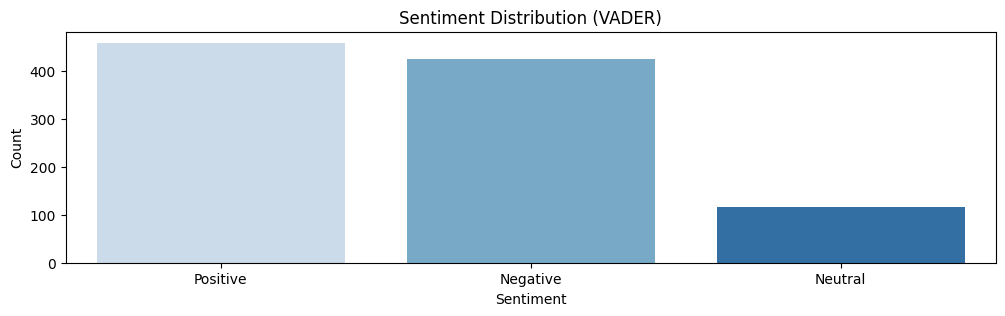

<ipython-input-90-0b6cacc50f1c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TextBlob Label'], palette='Greens')


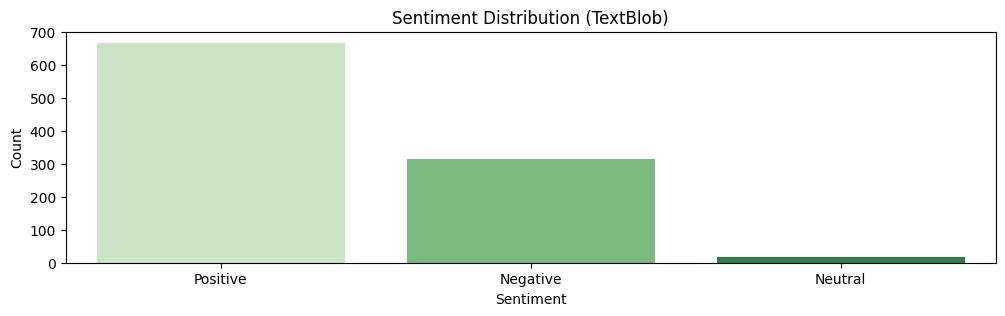

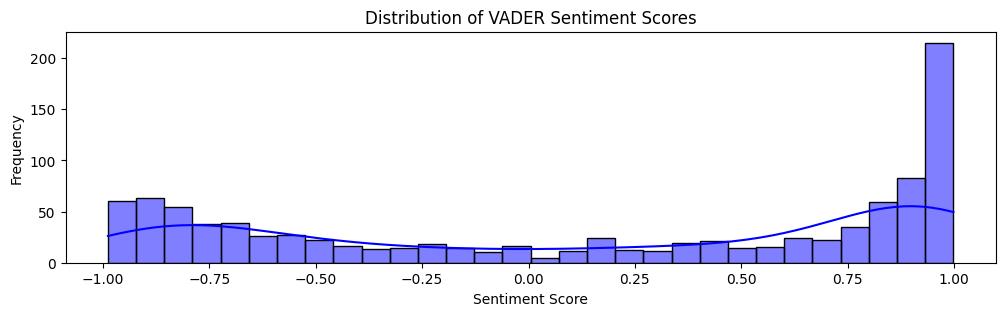

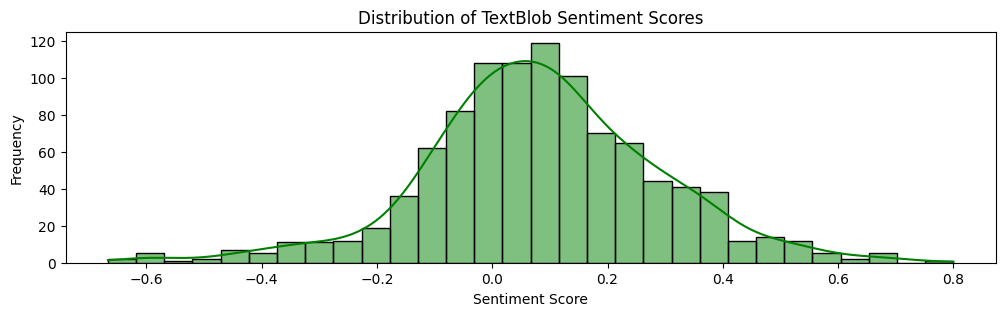

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 3))
sns.countplot(x=df['Analysis'], palette='Blues')
plt.title('Sentiment Distribution (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 3))
sns.countplot(x=df['TextBlob Label'], palette='Greens')
plt.title('Sentiment Distribution (TextBlob)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 3))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='blue')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 3))
sns.histplot(df['TextBlob Sentiment'], bins=30, kde=True, color='green')
plt.title('Distribution of TextBlob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-91-39a286a62c46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Sentiment', x='Analysis', palette='Blues')


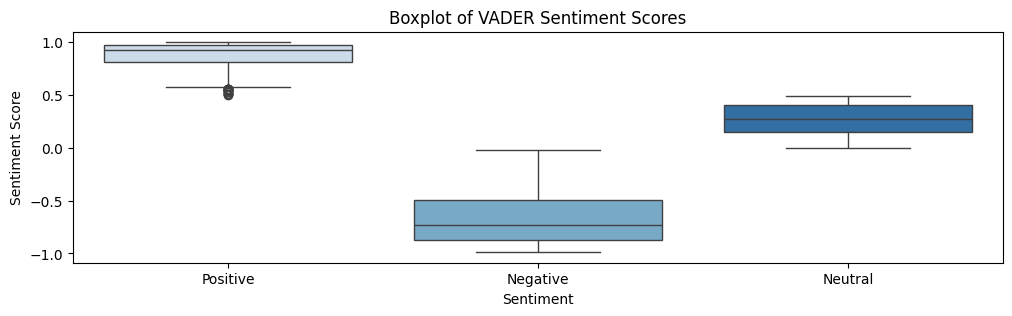

<ipython-input-91-39a286a62c46>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='TextBlob Sentiment', x='TextBlob Label', palette='Greens')


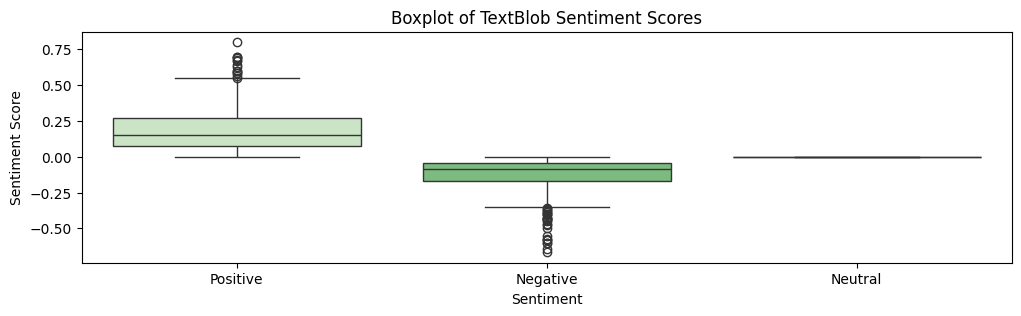

In [ ]:
# Boxplot of Sentiment Scores
plt.figure(figsize=(12, 3))
# Use 'Analysis' column which contains sentiment labels instead of 'VADER Label'
sns.boxplot(data=df, y='Sentiment', x='Analysis', palette='Blues')
plt.title('Boxplot of VADER Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()

plt.figure(figsize=(12, 3))
sns.boxplot(data=df, y='TextBlob Sentiment', x='TextBlob Label', palette='Greens')
plt.title('Boxplot of TextBlob Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.show()

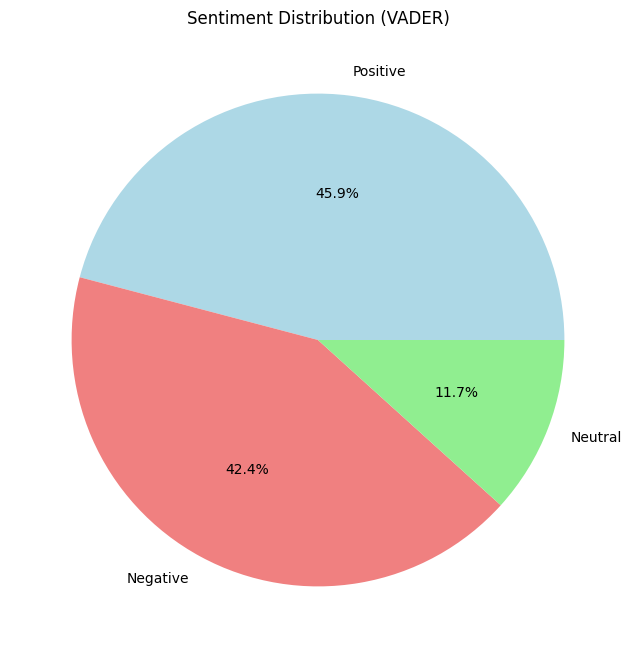

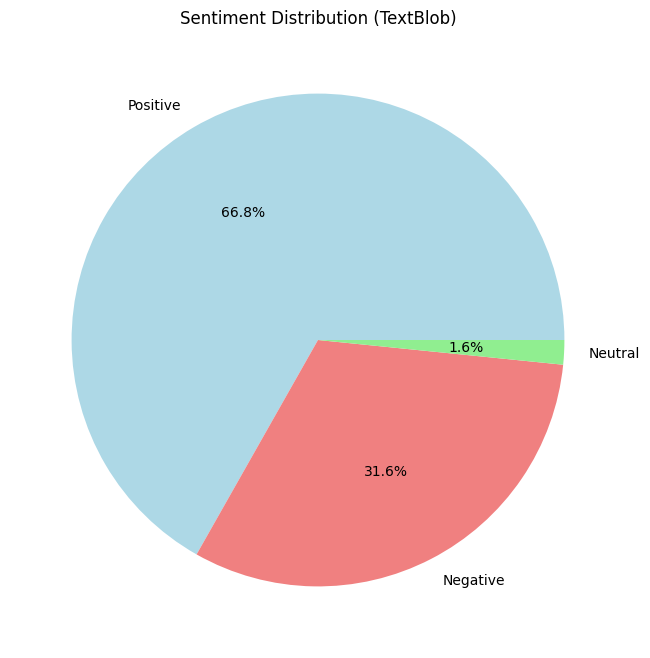

In [ ]:
# Pie Chart for Sentiment Distribution
plt.figure(figsize=(8, 8))
df['Analysis' ].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution (VADER)')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 8))
df['TextBlob Label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Sentiment Distribution (TextBlob)')
plt.ylabel('')
plt.show()

In [ ]:
!pip install wordcloud

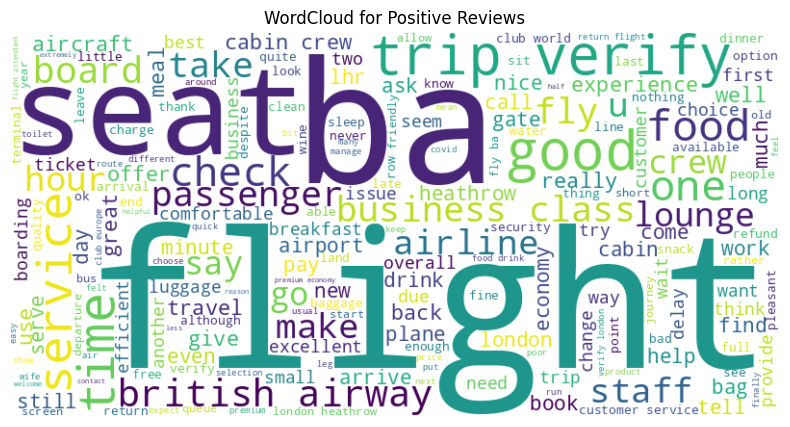

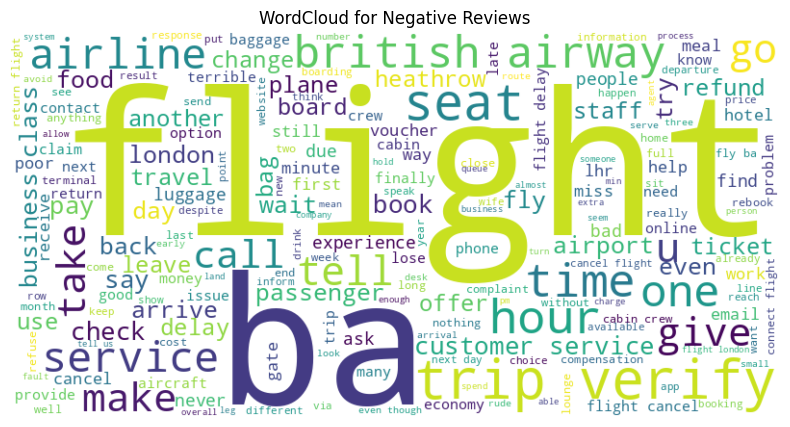

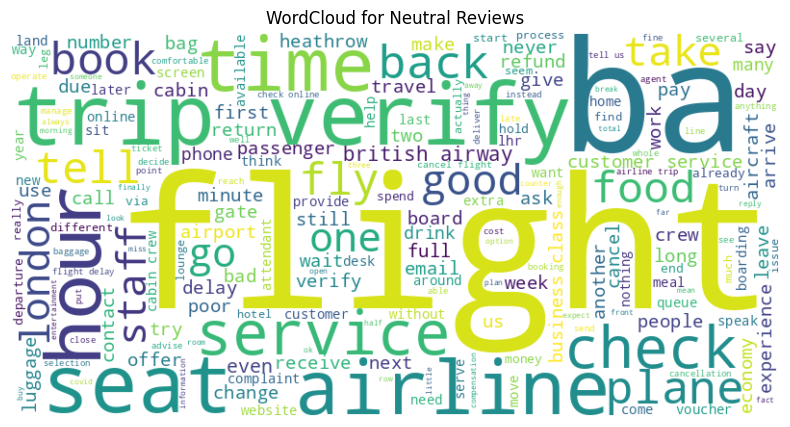

In [ ]:
# WordCloud for most common words
from wordcloud import WordCloud

positive_words = ' '.join(df[df['Analysis'] == 'Positive']['Lemma'])
negative_words = ' '.join(df[df['Analysis'] == 'Negative']['Lemma'])
neutral_words = ' '.join(df[df['Analysis'] == 'Neutral']['Lemma'])

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')
plt.show()

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Reviews')
plt.show()

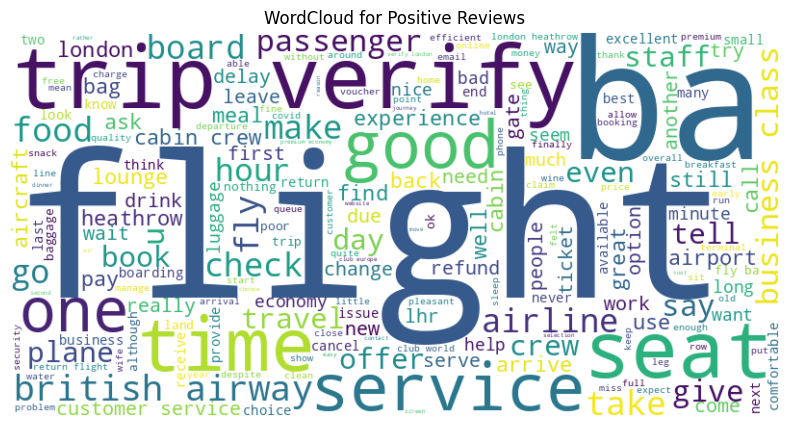

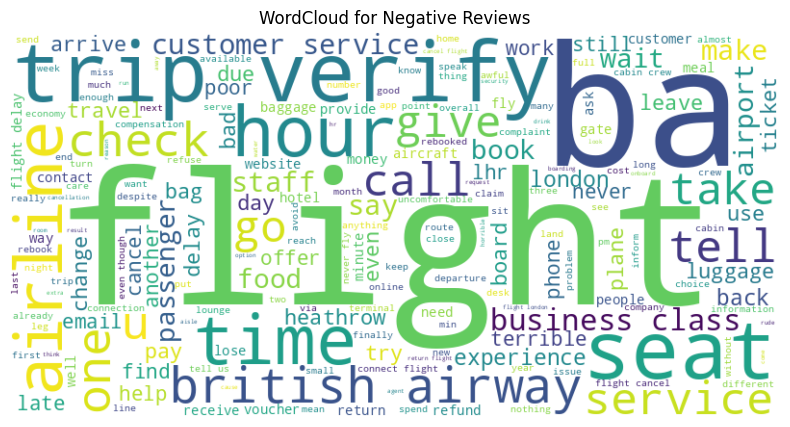

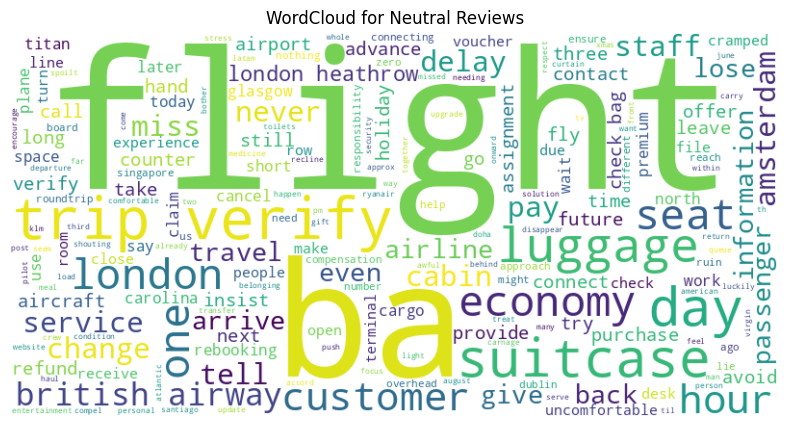

In [ ]:
positive_words = ' '.join(df[df['TextBlob Label'] == 'Positive']['Lemma'])
negative_words = ' '.join(df[df['TextBlob Label'] == 'Negative']['Lemma'])
neutral_words = ' '.join(df[df['TextBlob Label'] == 'Neutral']['Lemma'])

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Negative Reviews')
plt.show()

plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Neutral Reviews')
plt.show()